<a href="https://colab.research.google.com/github/allielabrecque4-debug/Machine-Learning-Labrecque/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Machine Leaning Homework 3
#Allie Labrecque
#662016931

In [2]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

csv_path1 = '/content/drive/MyDrive/aircraft_performance.csv'
test = pd.read_csv(csv_path1)



Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler

features = test[['Speed_kmh', 'FuelFlow_kgph']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

from sklearn.cluster import KMeans

kmeans_models = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    kmeans_models.append(kmeans)

    from sklearn.metrics import silhouette_score

silhouette_scores = {}
for k, kmeans in zip(range(2, 7), kmeans_models):
    labels = kmeans.predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores[k] = score

print(silhouette_scores)

{2: np.float64(0.6404033542802476), 3: np.float64(0.6897697333231053), 4: np.float64(0.7945390957110717), 5: np.float64(0.7290916642346795), 6: np.float64(0.7439566179282908)}


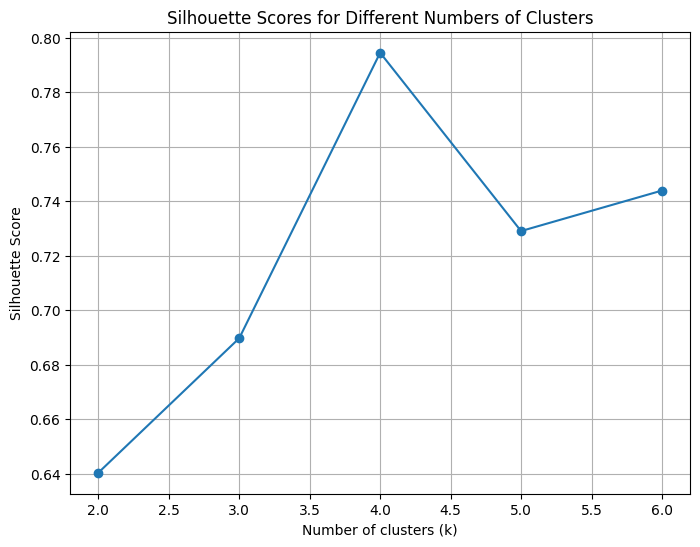

In [ ]:
# Plot silhouette scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

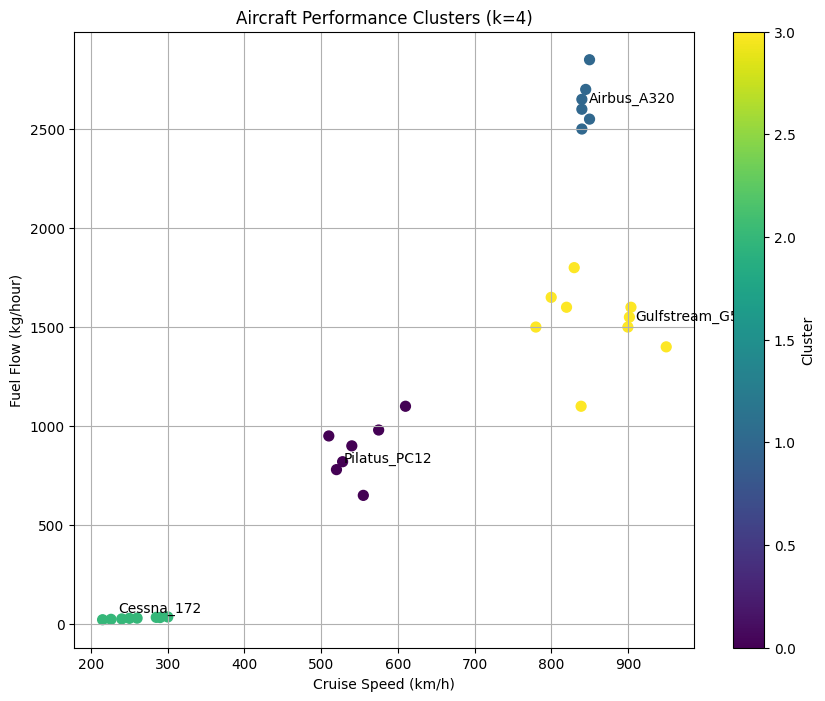

In [ ]:
# based on the silhouette plot, k = 4 is the best value
k_plot = 4

kmeans_4 = KMeans(n_clusters=k_plot, random_state=42, n_init=10)
kmeans_4.fit(scaled_features)

# Add cluster labels to the original dataframe
test['cluster'] = kmeans_4.labels_
# Create a scatter plot colored by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(test['Speed_kmh'], test['FuelFlow_kgph'], c=test['cluster'], cmap='viridis', s=50)
plt.xlabel('Cruise Speed (km/h)')
plt.ylabel('Fuel Flow (kg/hour)')
plt.title('Aircraft Performance Clusters (k=4)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)

# optional: add labels to make the clusters easier to identify
representative_aircraft = ['Cessna_172', 'Pilatus_PC12', 'Airbus_A320', 'Gulfstream_G550']

# Add labels for representative aircraft
for aircraft_name in representative_aircraft:
    aircraft_data = test[test['Aircraft'] == aircraft_name]
    if not aircraft_data.empty: # Check if aircraft data exists
        plt.annotate(aircraft_name, (aircraft_data['Speed_kmh'].iloc[0], aircraft_data['FuelFlow_kgph'].iloc[0]),
                     xytext=(5, 5), textcoords='offset points')


plt.show()

The aircraft with low cruise speed and low fuel flow (green) are smaller aircraft for recreational or personal use. The aircraft with a higher speed and fuel flow (purple) are slightly larger planes than the green group, but still primarily for transporting only a few people. <br>
The yellow cluster has some of the highest cruise speeds, but not the highest fuel use. Planes in the yellow cluster are often used as private jets. The blue cluster has similar speeds to the yellow, but much higher fuel flow. The blue cluster represents commercial passenger planes that can carry hundreds of passengers, such as the Airbus A320. <br>
These clusters makes sense, since one would expect jets, like the Airbus for example, to have the highest speeds and fuel usage. Meanwhile, a small plane, like a Cessna, would have a much lower speed and fuel consumption.

Saving housingprices.txt to housingprices (2).txt
User uploaded file "housingprices (2).txt" with length 1359 bytes


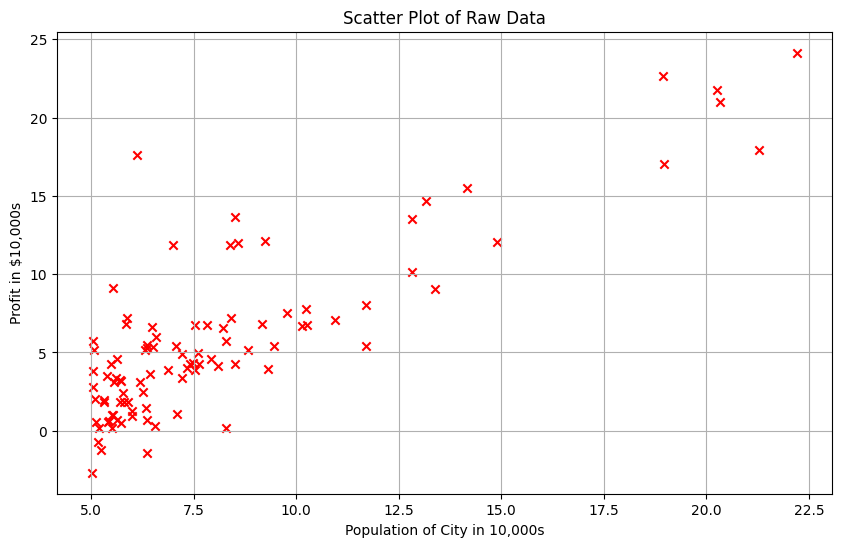

In [ ]:
# PROBLEM 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
from google.colab import drive
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

datafile = 'housingprices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, marker='x', color='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter Plot of Raw Data')
plt.grid(True)
plt.show()

Training with batch size: 1
Finished training with batch size: 1
Training with batch size: 5
Finished training with batch size: 5
Training with batch size: 10
Finished training with batch size: 10
Training with batch size: 20
Finished training with batch size: 20


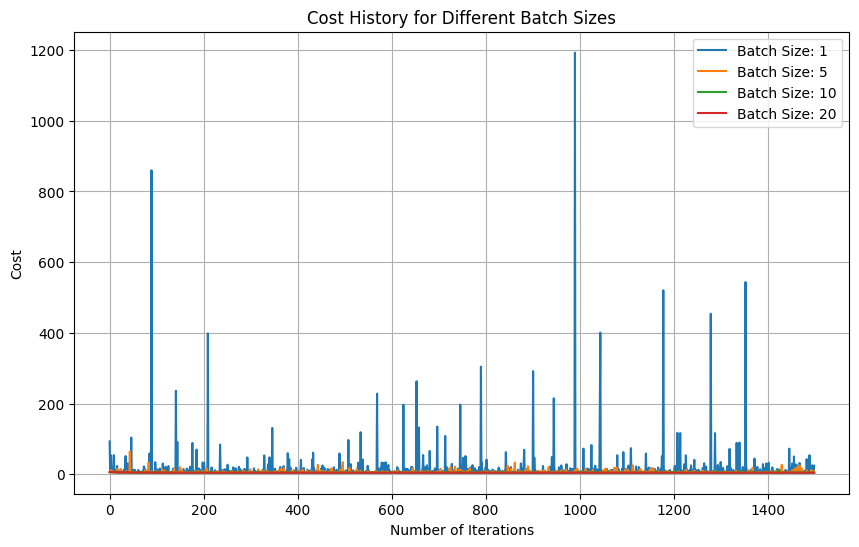

In [ ]:
def computeCost(X, y, theta):
    """
    Calculates the cost (mean squared error) for linear regression.

    Args:
        X: The feature matrix.
        y: The target vector.
        theta: The model parameters.

    Returns:
        The calculated cost J.
    """
    m = y.size
    h = X @ theta
    squared_errors = (h - y) ** 2
    J = (1/(2*m)) * np.sum(squared_errors)
    return J

def miniBatchGradientDescent(X, y, theta, alpha, num_iters, batch_size):
    """
    Performs mini-batch gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.

    Args:
        X: The feature matrix.
        y: The target vector.
        theta: The initial model parameters.
        alpha: The learning rate.
        num_iters: The number of iterations (epochs).
        batch_size: The size of the mini-batch.

    Returns:
        theta: The learned model parameters.
        J_history: A list of the cost after each iteration.
    """
    m = y.size
    J_history = []

    for i in range(num_iters):
        # Shuffle the data
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Initialize cost for the current epoch (optional, mainly for debugging/tracking within epoch)
        epoch_cost = 0

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:min(j + batch_size, m)]
            y_batch = y_shuffled[j:min(j + batch_size, m)]
            m_batch = y_batch.size

            h_batch = X_batch @ theta
            gradient = (1/m_batch) * X_batch.T @ (h_batch - y_batch)
            theta = theta - alpha * gradient

        # Calculate the cost over the entire dataset after each epoch
        cost_after_epoch = computeCost(X, y, theta)
        J_history.append(cost_after_epoch)

    return theta, J_history

# 1. Initialize model parameters
theta = np.zeros((X.shape[1], 1))

# 2. Define learning rate and number of iterations
alpha = 0.01
num_iters = 1500

# 3. Create a dictionary to store cost history
cost_history = {}

# 4. Define a list of batch sizes to iterate through
batch_sizes = [1, 5, 10, 20]

# 5. Loop through each batch size and train the model
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    _, J_hist = miniBatchGradientDescent(X, y, theta, alpha, num_iters, batch_size)
    cost_history[batch_size] = J_hist
    print(f"Finished training with batch size: {batch_size}")


plt.figure(figsize=(10, 6))
for batch_size, history in cost_history.items():
    plt.plot(range(len(history)), history, label=f'Batch Size: {batch_size}')

plt.title('Cost History for Different Batch Sizes')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Re-train the model with the best performing batch size (20) to get the theta values
theta_20, _ = miniBatchGradientDescent(X, y, np.zeros((X.shape[1], 1)), alpha, num_iters, 20)

# Prepare input features for prediction (population of 160,000)
# Assuming the original feature was population in 10,000s, 160,000 is 16.0
# Insert the intercept term (1) at the beginning
prediction_features = np.array([[1, 16.0]])

# Calculate the predicted price (in $10,000s)
predicted_price_10k = prediction_features @ theta_20

# Convert the predicted price to actual dollars
predicted_price_actual = predicted_price_10k[0,0] * 10000

# Print the predicted price
print(f"Predicted price for a city with a population of 160,000: ${predicted_price_actual:.2f}")

Predicted price for a city with a population of 160,000: $142621.21


When the batch size is 1, the cost fluctuates greatly across the number of iterations, while the other batch sizes are much less noisy. This implies that at batch size =1 the model struggles to converge to the global minimum, behaving like a stochastic gradient descent instead of the mini-batch gradient descent.

In [ ]:
# PROBLEM 3
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import numpy as np

breast_cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state=42, max_iter=10000)

# Create an RFE instance, selecting the top 2 features
rfe = RFE(estimator=logreg, n_features_to_select=2)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = rfe.support_

# Get the names of the selected features
selected_feature_names = breast_cancer_data.feature_names[selected_feature_indices]

print("Selected features:")
print(selected_feature_names)


# Find the indices of the selected features ('mean concavity' and 'worst concavity')
feature_names = breast_cancer_data.feature_names
selected_indices = np.where(np.isin(feature_names, selected_feature_names))[0]

# Select the features from the training data
X_train_selected = X_train[:, selected_indices]

logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train_selected, y_train)

feature_names = breast_cancer_data.feature_names
selected_indices = np.where(np.isin(feature_names, selected_feature_names))[0]
X_test_selected = X_test[:, selected_indices]

# Use the trained logistic_regression_model to make predictions on the selected test features
y_pred = logistic_regression_model.predict(X_test_selected)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Selected features:
['worst concavity' 'worst concave points']
Accuracy: 0.8596
Precision: 0.8443
Recall: 0.9537
F1-score: 0.8957

Confusion Matrix:
[[ 44  19]
 [  5 103]]


Based on the logistic regression, the best features to perform classification are "worst concavity" and "worst concave points" <br>
Based on the accuracy, precision, recall, and F1 score, the model is fairly reliable at predicting if a tumor is cancerous or not. For example, the preicision is 84.43% meaning that a case identified as positive would have an 84% chance of having been identified correctly, as shown in the confusion matrix.

In [5]:
# PROBLEM 4

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving housingprices.txt to housingprices.txt
User uploaded file "housingprices.txt" with length 1359 bytes


In [9]:
from sklearn.model_selection import train_test_split
# 70-30 split
datafile = 'housingprices.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1), unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tf = tf.constant(X_train, dtype=tf.float32)
X_test_tf = tf.constant(X_test, dtype=tf.float32)
y_train_tf = tf.constant(y_train, dtype=tf.float32)
y_test_tf = tf.constant(y_test, dtype=tf.float32)

y_train_tf = tf.reshape(y_train_tf, (-1, 1))
y_test_tf = tf.reshape(y_test_tf, (-1, 1))

In [10]:
# Clear any previous model definitions
tf.keras.backend.clear_session()

# Define the neural network model
model = tf.keras.Sequential([
    # Input layer expects 2 features and outputs 2 units
    tf.keras.layers.Input(shape=(2,)), # Explicitly define the input layer with shape (2,)
    tf.keras.layers.Dense(units=10, activation='relu'), # Increased units in the first layer
    tf.keras.layers.Dense(units=5, activation='relu'),  # Added another hidden layer
    # Output layer for regression (predicting a single value),
    # it receives 2 units from the previous layer
    tf.keras.layers.Dense(units=1)
])

# Print a summary of the model to verify the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.model_selection import train_test_split

datafile = 'housingprices.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1), unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tf = tf.constant(X_train, dtype=tf.float32)
X_test_tf = tf.constant(X_test, dtype=tf.float32)
y_train_tf = tf.constant(y_train, dtype=tf.float32)
y_test_tf = tf.constant(y_test, dtype=tf.float32)

y_train_tf = tf.reshape(y_train_tf, (-1, 1))
y_test_tf = tf.reshape(y_test_tf, (-1, 1))

# Clear any previous model definitions and redefine the model
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # Use the actual number of features from X_train
    tf.keras.layers.Dense(units=10, activation='relu'), # Increased units in the first layer
    tf.keras.layers.Dense(units=5, activation='relu'),  # Added another hidden layer
    tf.keras.layers.Dense(units=1)
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Changed optimizer to Adam and increased learning rate
              loss='mse',
              metrics=['mae'])

history = model.fit(X_train_tf, y_train_tf, epochs=10000, batch_size=32, verbose=2, validation_data=(X_test_tf, y_test_tf)) # Increased epochs

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
3/3 - 0s - 37ms/step - loss: 8.2429 - mae: 2.1290 - val_loss: 11.2822 - val_mae: 2.1454
Epoch 7502/10000
3/3 - 0s - 39ms/step - loss: 8.1207 - mae: 2.1287 - val_loss: 11.3198 - val_mae: 2.1558
Epoch 7503/10000
3/3 - 0s - 44ms/step - loss: 8.0830 - mae: 2.1513 - val_loss: 11.4247 - val_mae: 2.1737
Epoch 7504/10000
3/3 - 0s - 40ms/step - loss: 8.1083 - mae: 2.1875 - val_loss: 11.5135 - val_mae: 2.1840
Epoch 7505/10000
3/3 - 0s - 38ms/step - loss: 8.1307 - mae: 2.1990 - val_loss: 11.4285 - val_mae: 2.1743
Epoch 7506/10000
3/3 - 0s - 39ms/step - loss: 8.0871 - mae: 2.1838 - val_loss: 11.4179 - val_mae: 2.1729
Epoch 7507/10000
3/3 - 0s - 37ms/step - loss: 8.0836 - mae: 2.1778 - val_loss: 11.3413 - val_mae: 2.1605
Epoch 7508/10000
3/3 - 0s - 38ms/step - loss: 8.1259 - mae: 2.1523 - val_loss: 11.3130 - val_mae: 2.1536
Epoch 7509/10000
3/3 - 0s - 38ms/step - loss: 8.0817 - mae: 2.1481 - val_loss: 11.4969 - val_mae: 2.1819
Epoc

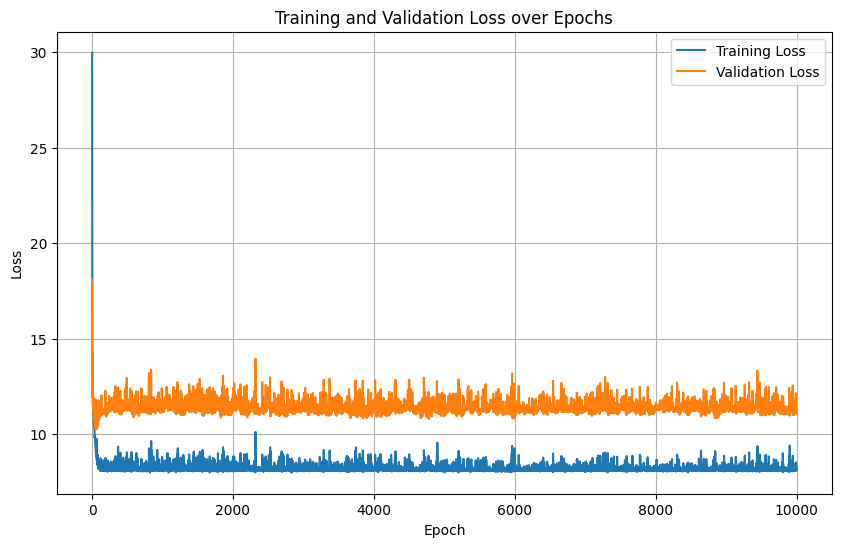

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
evaluation_results = model.evaluate(X_test_tf, y_test_tf, verbose=0)

# The evaluate method returns a list: [loss, metric1, metric2, ...]
# We specified 'mae' as the only metric besides the loss.
mae = evaluation_results[1]

print(f"Mean Absolute Error on the validation data: {mae:.4f}")

Mean Absolute Error on the validation data: 2.1338


In [14]:
# Create a NumPy array for the input features for a city with a population of 165,000.
# Remember that the population in the original dataset is in units of 10,000s, so 165,000 is 16.5.
prediction_features_np = np.array([[16.5]])

# Convert this NumPy array to a TensorFlow tensor with the same data type as the training input tensor.
prediction_features_tf = tf.constant(prediction_features_np, dtype=X_train_tf.dtype)

predicted_price_10k_np = model.predict(prediction_features_tf)

predicted_price_10k_scalar = predicted_price_10k_np[0, 0]

predicted_price_actual = predicted_price_10k_scalar * 10000

# Print the calculated predicted price in a user-friendly format.
print(f"Predicted price for a city with a population of 165,000: ${predicted_price_actual:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted price for a city with a population of 165,000: $160850.47


A learning rate of 0.01 and 10,000 epochs. With these conditions, the model took about 20 minutes to finish and had a MAE of about $21,000. <br> As shown in the plot, both the validation loss and training loss rapidly decrease and then plateau across the epochs. The validaiton loss is slightly higher than the training loss, which may indicate overfitting. Essentially, the model is learning well, but truggles with new data.